<a href="https://colab.research.google.com/github/Impksoni/AlgoMath/blob/main/LabWork1_Algorithmic_Maths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Write a python code for solving equation / finding the root of the given functions (exercise in class note) using
a. Bisection method
b. Secant method
c. Newton Raphson method***

**Importing the required libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import log10, cos, exp
import sympy as sp

**Function to apply Newton-Raphson mehtod**

In [4]:
def newton_raphson(f, f_prime, x0, tolerance=1e-6, max_iter=100):
    for i in range(max_iter):
        fx = f(x0)
        fpx = f_prime(x0)
        if fpx == 0:
            raise ZeroDivisionError("Derivative is zero. No solution found.")
        x1 = x0 - fx / fpx
        if abs(x1 - x0) < tolerance:
            return x1
        x0 = x1
    raise ValueError("Method did not converge.")

In [5]:
# 1. Equation: x^4 - 4 = 0
def f1(x): return x**4 - 4
def f1_prime(x): return 4 * x**3

In [6]:
# 2. Equation: 3x = cos x + 1 => f(x) = 3x - cos(x) - 1
def f2(x): return 3*x - np.cos(x) - 1
def f2_prime(x): return 3 + np.sin(x)

In [7]:
# 3. Equation: x * log10(x) = 1.2 => f(x) = x*log10(x) - 1.2
def f3(x): return x * log10(x) - 1.2
def f3_prime(x): return log10(x) + 1 / np.log(10)

**Now root finding**

In [8]:
root1 = newton_raphson(f1, f1_prime, x0=2.0, tolerance=1e-6)
root2 = newton_raphson(f2, f2_prime, x0=0.5, tolerance=1e-6)
root3 = newton_raphson(f3, f3_prime, x0=2.8, tolerance=1e-6)

In [9]:
# Printing the roots of the given questions
print(f"Root of x^4 - 4 = 0: x = {root1:.6f}")
print(f"Root of 3x = cos(x) + 1: x = {root2:.6f}")
print(f"Root of x * log10(x) = 1.2: x = {root3:.6f}")

Root of x^4 - 4 = 0: x = 1.414214
Root of 3x = cos(x) + 1: x = 0.607102
Root of x * log10(x) = 1.2: x = 2.740646


**Now defining the Plotting function**

In [10]:
def plot_function(f, root, title, x_range):
    x_vals = np.linspace(*x_range, 400)
    y_vals = np.array([f(x) for x in x_vals])

    plt.figure(figsize=(8, 4))
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(root, color='red', linestyle='--', label=f'Root ≈ {root:.4f}')
    plt.plot(x_vals, y_vals, label='f(x)', color='blue')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

**Now plotting the graph for each function**

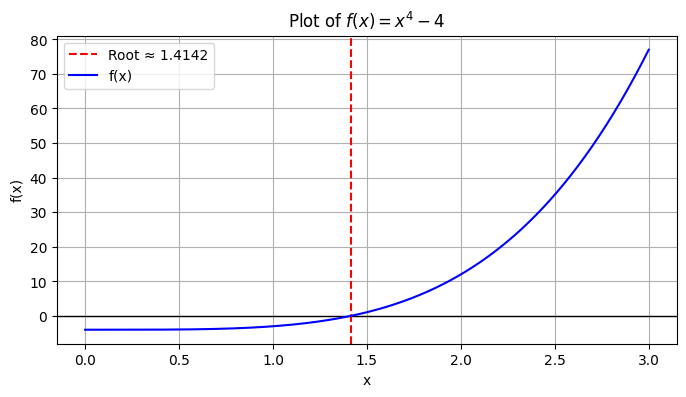

In [11]:
plot_function(f1, root1, r"Plot of $f(x) = x^4 - 4$", (0, 3))

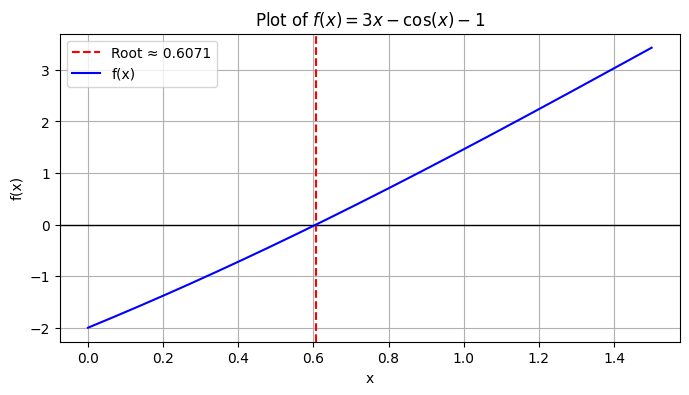

In [12]:
plot_function(f2, root2, r"Plot of $f(x) = 3x - \cos(x) - 1$", (0, 1.5))

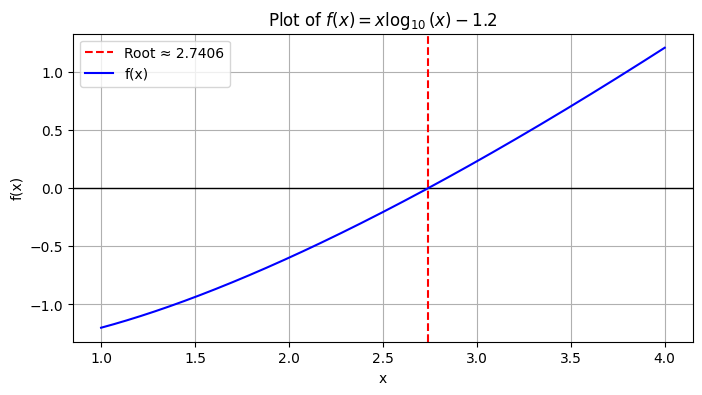

In [13]:
plot_function(f3, root3, r"Plot of $f(x) = x \log_{10}(x) - 1.2$", (1, 4))

**Now Defining function for SECANT METHOD implementaion**

In [14]:
def secant_method(f, x0, x1, tolerance=1e-6, max_iter=100):
    for _ in range(max_iter):
        if f(x1) - f(x0) == 0:
            raise ZeroDivisionError("Zero denominator in Secant method.")
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        if abs(x2 - x1) < tolerance:
            return x2
        x0, x1 = x1, x2
    raise ValueError("Secant method did not converge.")

In [15]:
# Function 1: x^3 - 2x - 5
def f1(x): return x**3 - 2*x - 5

# Function 2: x*e^x - cos(x)
def f2(x): return x * exp(x) - cos(x)

In [16]:
# Finding roots using Secant Method
root4 = secant_method(f1, 2, 3, tolerance=1e-6)
root5 = secant_method(f2, 0, 1, tolerance=1e-6)

**Now Plotting each function and root**

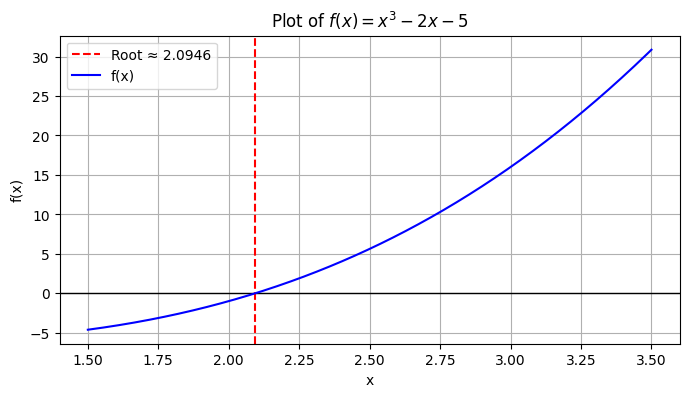

In [17]:
plot_function(f1, root4, r"Plot of $f(x) = x^3 - 2x - 5$", (1.5, 3.5))

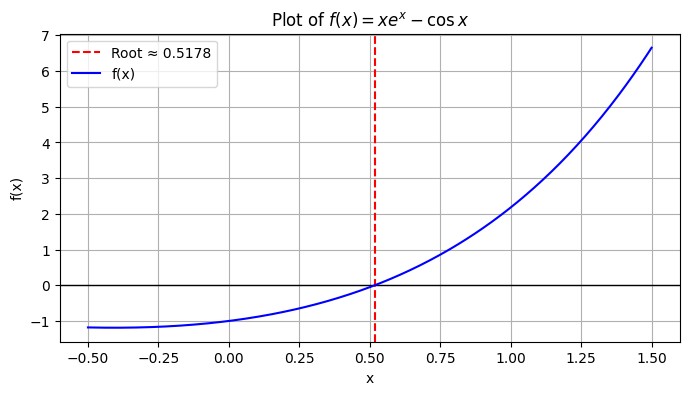

In [18]:
plot_function(f2, root5, r"Plot of $f(x) = x e^x - \cos x$", (-0.5, 1.5))

**Defining the Bisection method function**

In [19]:
def bisection_method(f, a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) >= 0:
        raise ValueError("Bisection method fails: f(a) and f(b) must have opposite signs.")
    for _ in range(max_iter):
        c = (a + b) / 2
        if abs(f(c)) < tol or abs(b - a) / 2 < tol:
            return c
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    raise RuntimeError("Bisection method did not converge")

In [20]:
# Define all functions

def f1(x): return x**4 - 4
def f2(x): return 3*x - cos(x) - 1
def f3(x): return x * log10(x) - 1.2
def f4(x): return x**3 - 2*x - 5
def f5(x): return x * exp(x) - cos(x)

In [21]:
# Root Calculations

root1 = bisection_method(f1, 1, 2)
root2 = bisection_method(f2, 0, 1)
root3 = bisection_method(f3, 2, 3)
root4 = bisection_method(f4, 2, 3)
root5 = bisection_method(f5, 0, 1)

In [22]:
# Printing the calculated roots using biscetion method
print(f"Root of x^4 - 4 = 0: x = {root1:.6f}")
print(f"Root of 3x = cos(x) + 1: x = {root2:.6f}")
print(f"Root of x*log10(x) = 1.2: x = {root3:.6f}")
print(f"Root of x^3 - 2x - 5 = 0: x = {root4:.6f}")
print(f"Root of x*e^x = cos(x): x = {root5:.6f}")

Root of x^4 - 4 = 0: x = 1.414214
Root of 3x = cos(x) + 1: x = 0.607101
Root of x*log10(x) = 1.2: x = 2.740646
Root of x^3 - 2x - 5 = 0: x = 2.094552
Root of x*e^x = cos(x): x = 0.517757


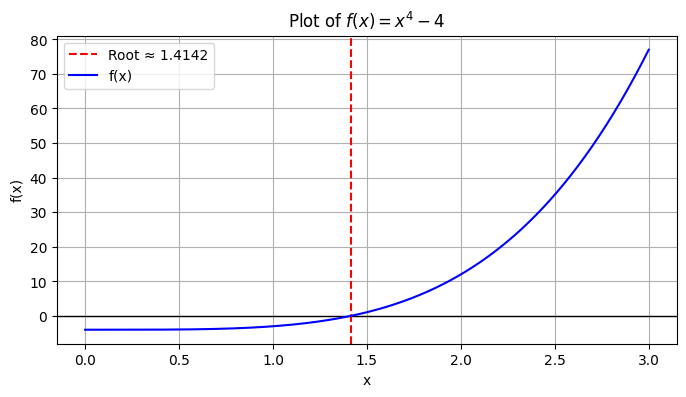

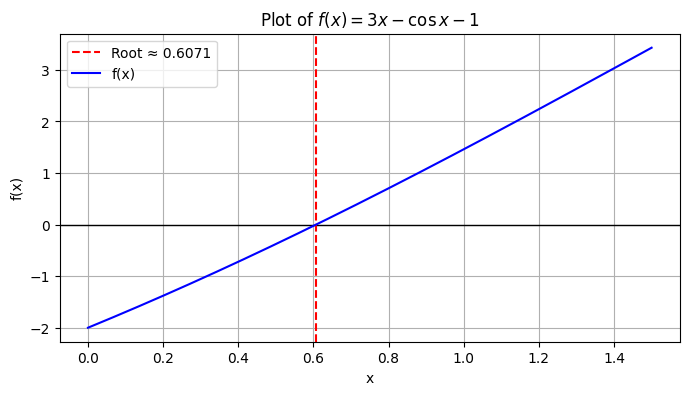

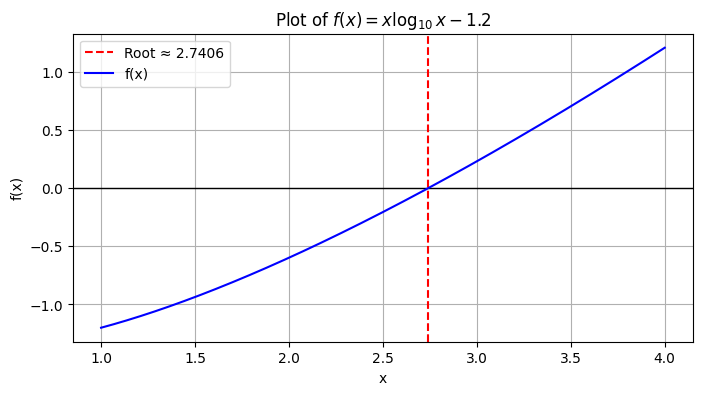

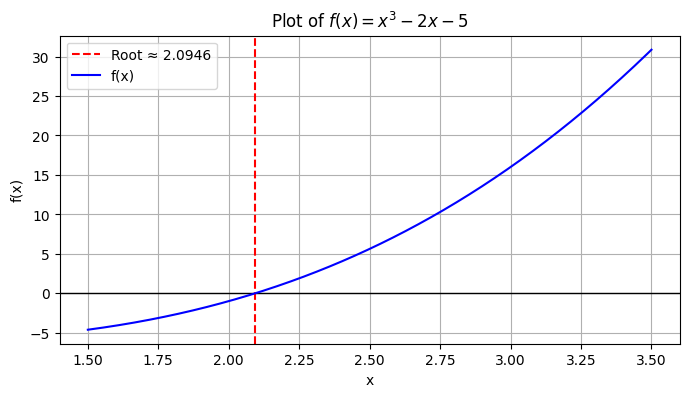

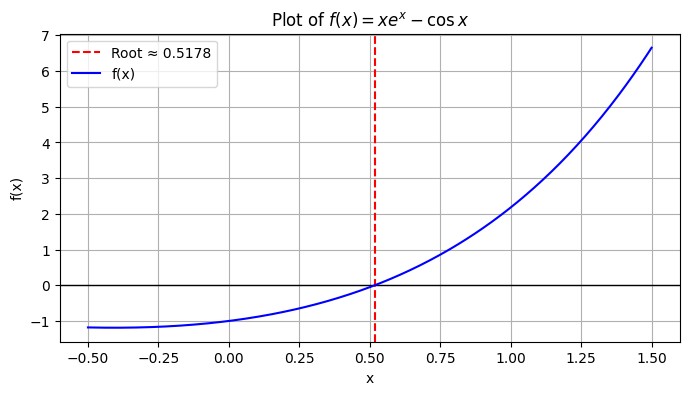

In [23]:
# Plot each function

plot_function(f1, root1, r"Plot of $f(x) = x^4 - 4$", (0, 3))
plot_function(f2, root2, r"Plot of $f(x) = 3x - \cos x - 1$", (0, 1.5))
plot_function(f3, root3, r"Plot of $f(x) = x \log_{10} x - 1.2$", (1, 4))
plot_function(f4, root4, r"Plot of $f(x) = x^3 - 2x - 5$", (1.5, 3.5))
plot_function(f5, root5, r"Plot of $f(x) = x e^x - \cos x$", (-0.5, 1.5))